# CITI NY Bike Data Analysis <br>

In this analysis I will be doing analysis through **Citi Bike in the NY** from data provided by **Career Foundry Challange**. The main problem statement that has been defined are : <br>

<ol>
<li>What are the most popular pick-up locations across the city for NY Citi Bike rental?
<li>How does the average trip duration vary across different age groups?
<li>Which age group rents the most bikes?
<li>How does bike rental vary across the two user groups (one-time users vs long-term subscribers) on different days of the week?
<li>Does user age impact the average bike trip duration?
</ol>
<br>

In [71]:
#Environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#installing sql enabler
!pip install sqldf

import sqldf
print("Setup Complete")

Setup Complete


## 1) Data Preparation and Cleanign Step

In this stage we will import the data into Pandas Dataframe, Explore to familiarize and do basic cleaning.

In [2]:
cb = pd.read_csv('NYCitiBikes.csv')
cb.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,01-01-17 01:56,01-01-17 02:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,1-1-17 02:12,01-01-17 02:23,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


In [3]:
cb.columns

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')

In [4]:
df = cb[['Start Time','Start Station Name','User Type','Age','Age Groups','Trip Duration']]

In [5]:
df.head()

,Start Time,Start Station Name,User Type,Age,Age Groups,Trip Duration
0,01-01-17 00:38,McGinley Square,Subscriber,60,55-64,1513
1,01-01-17 01:47,Exchange Place,Subscriber,28,25-34,639
2,01-01-17 01:47,Exchange Place,Subscriber,28,25-34,639
3,01-01-17 01:56,Grove St PATH,Subscriber,51,45-54,258
4,1-1-17 02:12,Jersey & 6th St,Subscriber,43,35-44,663


In [6]:
#formatting the start Time col to have the same format all
df['Start Time'] = pd.to_datetime(df['Start Time'])

C:\Users\Vito A S\AppData\Local\Temp\ipykernel_15344\3772065249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time'] = pd.to_datetime(df['Start Time'])


In [7]:
print(df.shape)

(20400, 6)


In [8]:
#Handling Duplicates
df = df.drop_duplicates()
print(df.shape)

(16842, 6)


In [9]:
df.isna().sum()
#Dapat dilihat tidak ada missing value dari data setb

Start Time            0
Start Station Name    0
User Type             0
Age                   0
Age Groups            0
Trip Duration         0
dtype: int64

In [92]:
df.dtypes

Start Time            datetime64[ns]
Start Station Name            object
User Type                     object
Age                            int64
Age Groups                    object
Trip Duration                  int64
dtype: object

In [102]:
#Changinge Start Time into date format
df['Start Time'] = pd.to_datetime(df['Start Time'])

# 2) EDA Data Exploration <br>

This step focus on finding insight through data. In this project we well try to use SQL Queries and Python function to summarize the data.

In [10]:
#What are the most popular pick-up locations across the city for NY Citi Bike rental?
querry = """
SELECT 
    "Start Station Name" AS PickUp_Point,
    count(*) AS Number
FROM df 
GROUP BY 1
ORDER BY 2 DESC;
"""
df_viz = sqldf.run(querry)

In [11]:
#Visualization
top = df_viz.loc[:4].sort_values(by='Number',ascending = True).reset_index(drop = True)

In [12]:
other = pd.DataFrame({
    'PickUp_Point': ['Others'],
    'Number': df_viz.loc[4:].sum()[1]
})
df_viz = pd.concat([top, other])

In [15]:
df_viz

,PickUp_Point,Number
0,Morris Canal,710
1,Hamilton Park,1069
2,Sip Ave,1084
3,Exchange Place,1225
4,Grove St PATH,2115
0,Others,11349


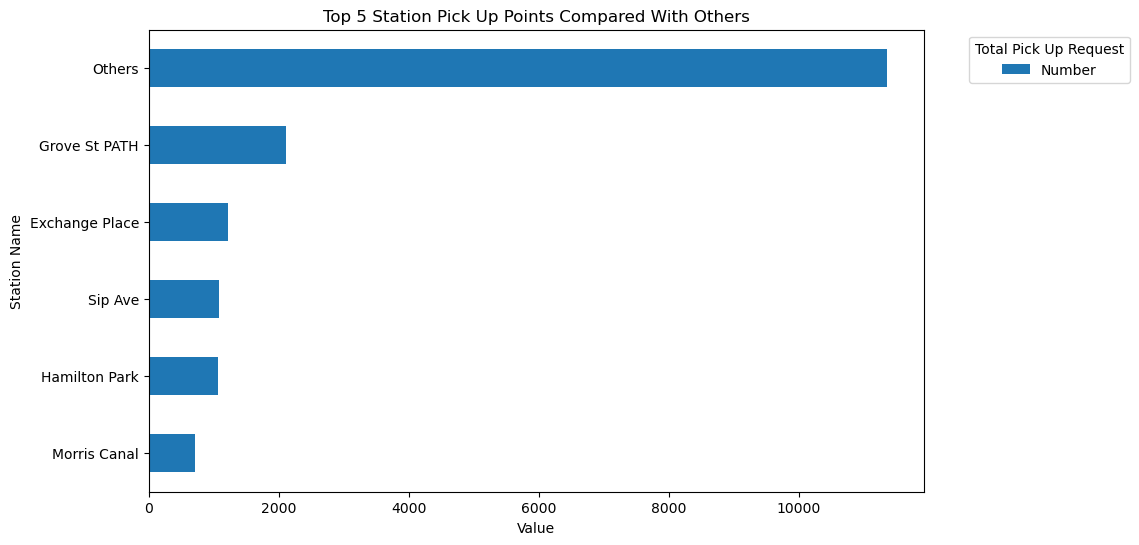

In [18]:
ax = df_viz.plot.barh(x = 'PickUp_Point',stacked = True, figsize = (10,6))
ax.set_xlabel('Value')
ax.set_ylabel('Station Name')
ax.set_title('Top 5 Station Pick Up Points Compared With Others')
ax.legend(title='Total Pick Up Request', bbox_to_anchor=(1.05, 1))
plt.show()

In [45]:
#How does the average trip duration vary across different age groups?
querry = """
SELECT
   "Age Groups" AS Usia ,
   AVG("Trip Duration")/60 AS "Durasi (menit)"
FROM df GROUP BY 1;
"""
df_viz = sqldf.run(querry)

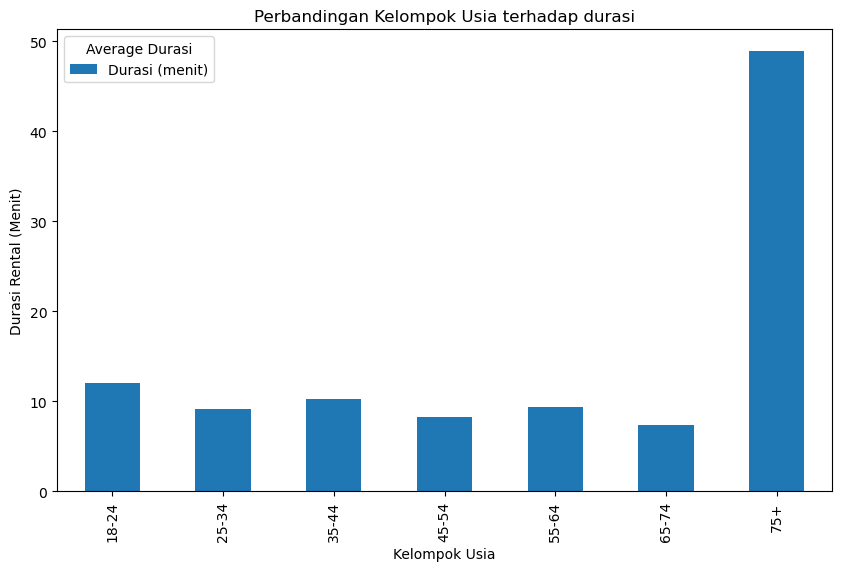

In [47]:
ax = df_viz.plot.bar(x = 'Usia',stacked = True, figsize = (10,6))
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Durasi Rental (Menit)')
ax.set_title('Perbandingan Kelompok Usia terhadap durasi')
ax.legend(title='Average Durasi')
plt.show()

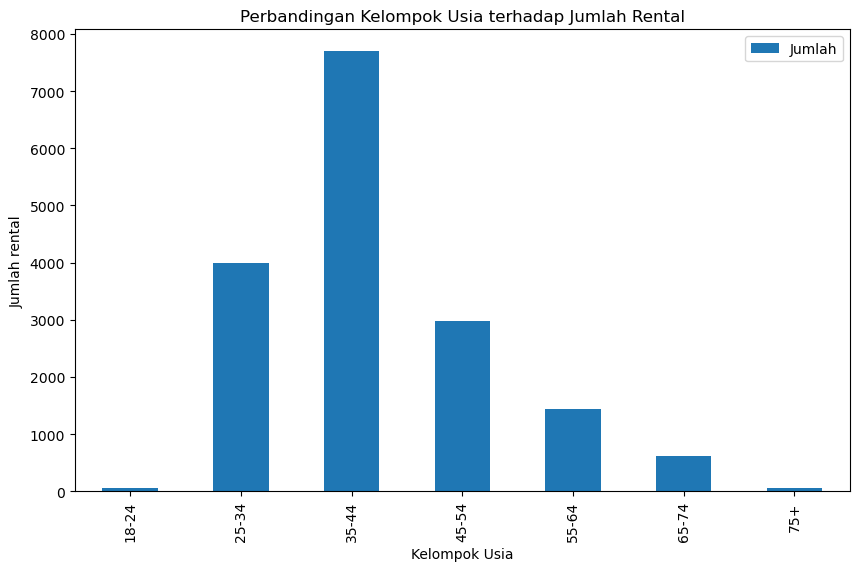

In [48]:
#Which age group rents the most bikes?
querry = """
SELECT
   "Age Groups" AS Usia ,
   COUNT(*) AS Jumlah
FROM df GROUP BY 1;
"""
df_viz = sqldf.run(querry)
ax = df_viz.plot.bar(x = 'Usia',stacked = True, figsize = (10,6))
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah rental')
ax.set_title('Perbandingan Kelompok Usia terhadap Jumlah Rental')
plt.show()

In [153]:
#How does bike rental vary across the 
#two user groups (one-time users vs long-term subscribers) on different days of the week?
df.dtypes

Start Time            object
Start Station Name    object
User Type             object
Age                    int64
Age Groups            object
Trip Duration          int64
DOW                   object
dtype: object

In [154]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['DOW'] = df['Start Time'].dt.day_name()

In [151]:
querry = """
SELECT
   DOW AS Hari ,
   "User Type",
   COUNT(*) AS Jumlah,
 CASE DOW 
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thurday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' Then 6
        ELSE 7 END AS id
FROM df GROUP BY 1,2 ORDER BY 4;
"""
sqldf.run(querry)

,Hari,User Type,Jumlah,id
0,Monday,One-time user,54,1
1,Monday,Subscriber,2603,1
2,Tuesday,One-time user,18,2
3,Tuesday,Subscriber,2475,2
4,Wednesday,One-time user,23,3
5,Wednesday,Subscriber,2290,3
6,Friday,One-time user,31,5
7,Friday,Subscriber,2956,5
8,Saturday,One-time user,100,6
9,Saturday,Subscriber,1581,6


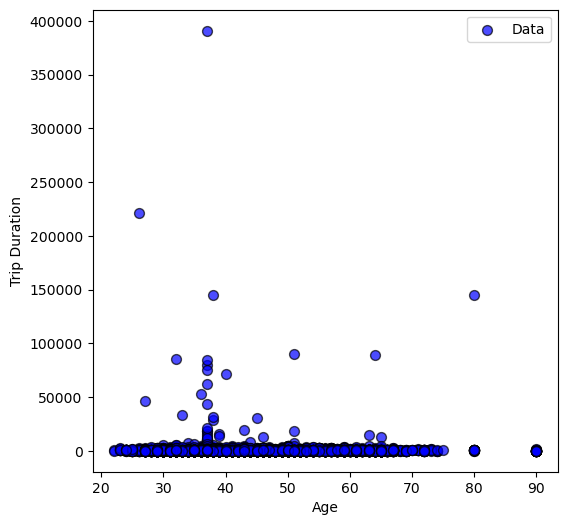

In [156]:
#Does user age impact the average bike trip duration?
df.plot(kind='scatter', x='Age', y='Trip Duration', figsize=(6, 6), marker='o', color='blue', edgecolor='black', s=50, alpha=0.7, label="Data")
plt.show()